In [1]:
import json # will be needed for saving preprocessing details
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
from sklearn.model_selection import train_test_split # will be used for data split
from sklearn.preprocessing import LabelEncoder # for preprocessing
from sklearn.ensemble import RandomForestClassifier # for training the algorithm
from sklearn.ensemble import ExtraTreesClassifier # for training the algorithm
import joblib # for saving algorithm and preprocessing objects

C:\Users\rasbby\Anaconda3\envs\DjangoRestProject\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# load dataset
df = pd.read_csv('final_dataset.csv', skipinitialspace=True)
x_cols = [c for c in df.columns if c != 'Found / Not Found']
# set input matrix and target column
X = df[x_cols]
y = df['Found / Not Found']

In [3]:
# data split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234)

In [4]:
# fill missing values
train_mode = dict(X_train.mode().iloc[0])
X_train = X_train.fillna(train_mode)
print(train_mode)

{'No. of Digite': 54.0, 'number of space': 0.0, 'Number(fromcharcode,charcodeAt,charAt)': 0.0, 'Long string': 0.0, 'longest string length': 0.0, 'hexa value': 0.0, 'eval()': 0.0, 'concat()': 0.0, 'iframe': 0.0, 'unescap()': 0.0, 'escape()': 0.0, 'search()': 0.0, 'setAttribute()': 0.0, 'toStiring()': 0.0, 'parseInt()': 0.0, 'setTimeout()': 0.0, 'ActiveXObject()': 0.0, 'split()': 0.0, 'substring()': 0.0, 'replace()': 0.0, 'decode()': 0.0, 'Math.random()': 0.0, 'console.log()': 0.0, 'document.addEventListener()': 0.0, 'window.location()': 0.0, 'attachEvent()': 0.0, 'createElement()': 0.0, 'getElementById()': 0.0, 'getCookie': 0.0, 'document.write()': 0.0, 'onerror()': 0.0, 'onunload()': 0.0, 'onload()': 0.0, 'dispatchEvent': 0.0, '.js': 0.0, '.php': 0.0, 'var': 0.0, 'function': 0.0, 'var _': 0.0, 'encodeURIComponent': 0.0, 'decodeURIComponent': 0.0, '/': 4.0, '|': 0.0, '%': 0.0, 'no of( \\)': 0.0, 'no of =': 8.0, ';': 18.0, '#': 0.0, 'no of +': 0.0, '.': 1.0, "no of '": 0.0}


In [5]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
# save preprocessing objects and RF algorithm
joblib.dump(train_mode, "./train_mode.joblib", compress=True)
joblib.dump(clf, "./random_forest.joblib", compress=True)
y_pred=clf.predict(X_test)
print(y_pred)

[0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 1]


In [6]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Training set metrics:')
print('Accuracy:', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Precision:', metrics.precision_score(y_train, clf.predict(X_train)))
print('Recall:', metrics.recall_score(y_train, clf.predict(X_train)))
recall_score_train=metrics.recall_score(y_train, clf.predict(X_train))
print('Test set metrics:')
print('Accuracy:', metrics.accuracy_score(y_test, clf.predict(X_test)))
print('Precision:', metrics.precision_score(y_test, clf.predict(X_test)))
print('Recall:', metrics.recall_score(y_test, clf.predict(X_test)))
recall_score_test=metrics.recall_score(y_test, clf.predict(X_test))

Training set metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Test set metrics:
Accuracy: 0.9466666666666667
Precision: 0.9615384615384616
Recall: 0.8928571428571429


In [7]:
avg_accu_score=(0.9333333333333333+0.9333333333333333+0.92+0.9466666666666667+0.9333333333333333)/5
avg_prec_score=(0.96+0.96+0.9583333333333334+0.9615384615384616+0.96)/5
avg_rec_score=(0.8571428571428571+0.8571428571428571
+0.8214285714285714+0.8928571428571429+0.8571428571428571)/5

print('avarage accuracy',avg_accu_score)
print('avarage precision',avg_prec_score)
print('avarage recall',avg_rec_score)

avarage accuracy 0.9333333333333333
avarage precision 0.9599743589743589
avarage recall 0.8571428571428571


In [8]:
l=[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,5217,32,5,32,133,0,0,117,0,0,61,0,33,250,0]
print(len(l))
#clf.predict([l])

51


In [9]:
data = pd.read_csv("final_dataset.csv")
X = data.iloc[:,0:51]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(51).plot(kind='barh')
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2, Size[1]*2, forward=True)
plt.show()
# fig = plt.gcf()
# fig.set_size_inches(5.5, 5.5)
# fig.savefig('dataset3png.png', dpi=50)

[0.0144775  0.0555293  0.02062959 0.00729267 0.02394228 0.00526574
 0.05205521 0.00912677 0.02459949 0.01189677 0.00503654 0.00569431
 0.01144898 0.00612307 0.01388651 0.00819914 0.0160987  0.00308199
 0.00737871 0.00928322 0.00153043 0.01456109 0.00428739 0.00493608
 0.00936605 0.00394332 0.01126648 0.00542433 0.00922087 0.01626429
 0.00082814 0.         0.00721615 0.00189858 0.01721439 0.0090603
 0.02454422 0.03071784 0.02179987 0.01305203 0.00352241 0.08254043
 0.1447303  0.00554512 0.02902303 0.04267983 0.00894626 0.02636018
 0.0157376  0.10644409 0.01629238]


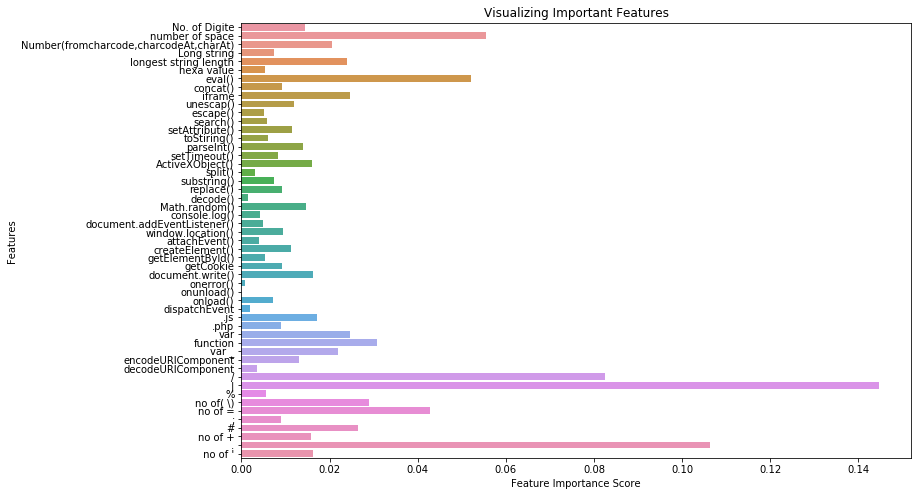

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
# Creating a bar plot
sns.barplot(x=feat_importances, y=feat_importances.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
# plt.legend()
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2, Size[1]*2, forward=True)
plt.show()
# fig = plt.gcf()
# fig.set_size_inches(10.5, 10.5)
# fig.savefig('test3png.png', dpi=100)
#plt.savefig('viz.png',dpi=200)

In [11]:

feature_imp = pd.Series(clf.feature_importances_,index=x_cols).sort_values(ascending=False)
feature_imp

|                                         0.155548
.                                         0.120444
no of =                                   0.116618
function                                  0.102910
number of space                           0.067630
var                                       0.067482
/                                         0.052586
#                                         0.051791
;                                         0.041715
no of +                                   0.025307
eval()                                    0.023498
No. of Digite                             0.021312
var _                                     0.019584
no of( \)                                 0.013231
no of '                                   0.013227
hexa value                                0.011019
setTimeout()                              0.009067
%                                         0.008101
replace()                                 0.006334
window.location()              

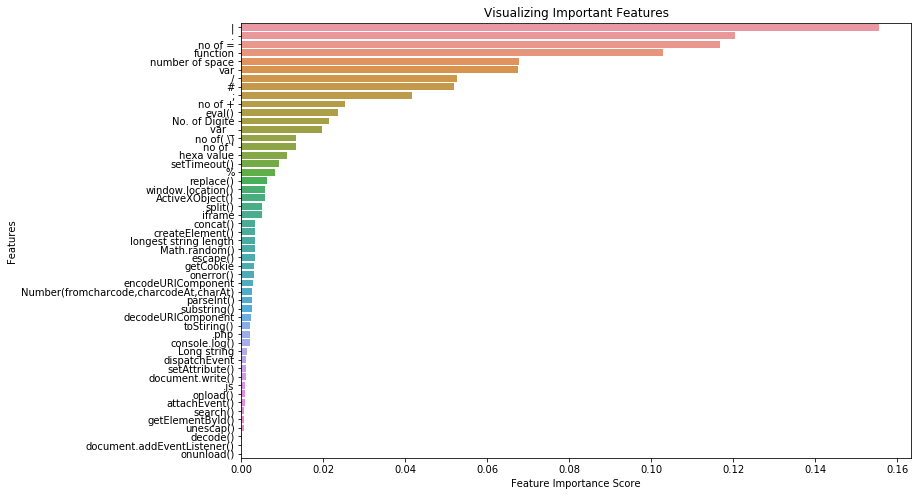

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2, Size[1]*2, forward=True)
plt.show()
# fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)
# fig.savefig('test3png.png', dpi=100)
#plt.savefig('viz.png',dpi=200)

In [13]:
all_input=[]
for i in range(len(df)):
    all_input.append(df.values[i][:-1])
    #print(df.values[i])
temp=0
for item in all_input:
    print(clf.predict([item]))

    

[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
